
Abraham Chávez Yáñez, Erick Orozco Reyes, Alexia Giselle Paz Jasso, Carlos, Oviedo



El Dataset que elegimos para este proyecto se llama "USA Real Estate Dataset" este mismo fue extraido de Kaggle, una comunidad en línea de cienci y análisis de datos, pueden revisar el dataset en el siguiente link: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset

Este Dataset es un archivo .Csv con 10 columnas.



*   status (Estatús de la casa - a. Lista para vender ó b. Lista para construir)
*   bed (Número de camas)
*   bath (Número de baños)
*   acre_lot (Tamaño del terreno)
*   city (Nombre de la ciudad)
*   state (Nombre del estado)
*   zip_code (Código postal del área)
*   house_size (Tamaño de la construcción)
*   prev_sold_date (Fecha de la última venta de la propiedad)
*   price (Precio de la propiedad)

Elegimos este Dataset ya que creímos muy conveniente analizar el mercado de bienes raíces en Estados Unidos ya que fue un tema de interés común entre nuestro equipo, por lo tanto la decisión fue muy sencilla.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("realtor-data.csv")

##Describe las medidas de centralidad, dispersión, skewness, kutorsis de cada variable

Media, Mediana y Moda de los datos

In [ ]:
df.mean(axis = 0, numeric_only = True)
df.median(axis = 0, numeric_only = True)
df.mode(axis = 0)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.09,San Juan,Massachusetts,1201.0,1200.0,2019-10-01,299900.0


Desviación estándar y varianza

In [ ]:
#bed 
print("Var: ", df['bed'].var())
print("Std Deviation: ", df['bed'].std())
# bath
print("Var: ", df['bath'].var())
print("Std Deviation: ", df['bath'].std())
# house_size
print("Var: ", df['house_size'].var())
print("Std Deviation: ", df['house_size'].std())
# price
print("Var: ", df['price'].var())
print("Std Deviation: ", df['price'].std())

Var:  4.373836067608825
Std Deviation:  2.091371814768676
Var:  2.475347225623952
Std Deviation:  1.5733236239324546
Var:  31644553.695707023
Std Deviation:  5625.349206556605
Var:  1031795445488.7234
Std Deviation:  1015773.3238713859


Rango de las variables

In [ ]:
rBed = max(df['bed']) - min(df['bed'])
print("Range 'bed': ", rBed)
rBath = max(df['bath']) - min(df['bath'])
print("Range 'bath': ", rBath)
rSize = max(df['house_size']) - min(df['house_size'])
print("Range 'house_size': ", rSize)
rPrice = max(df['price']) - min(df['price'])
print("Range 'price': ", rPrice)

Range 'bed':  85.0
Range 'bath':  55.0
Range 'house_size':  1450012.0
Range 'price':  59999555.0


Skewness

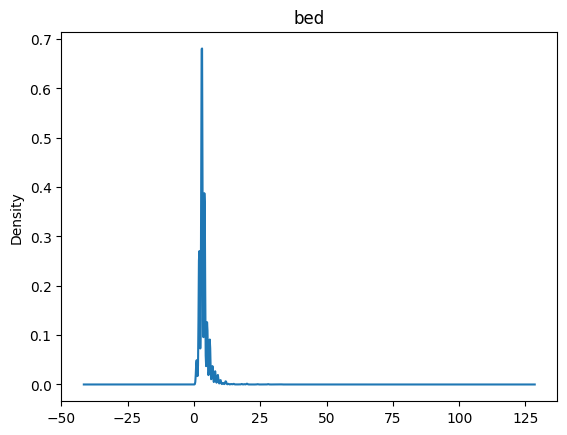

Skewness:  7.515860634206311


In [ ]:
data =  df['bed']
data.plot(title="bed", kind="density")
plt.show()
print("Skewness: ", data.skew())

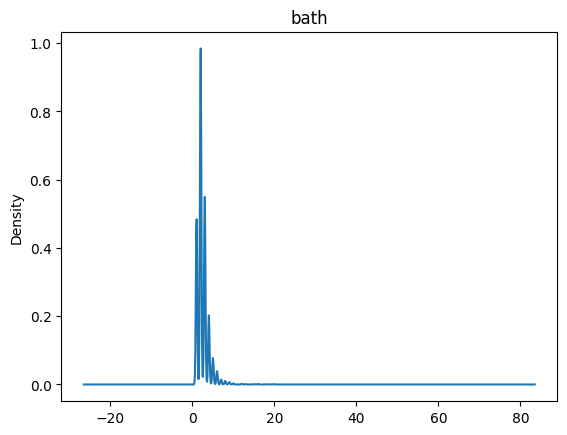

Skewness:  5.9646252641390785


In [ ]:
data =  df['bath']
data.plot(title="bath", kind="density")
plt.show()
print("Skewness: ", data.skew())

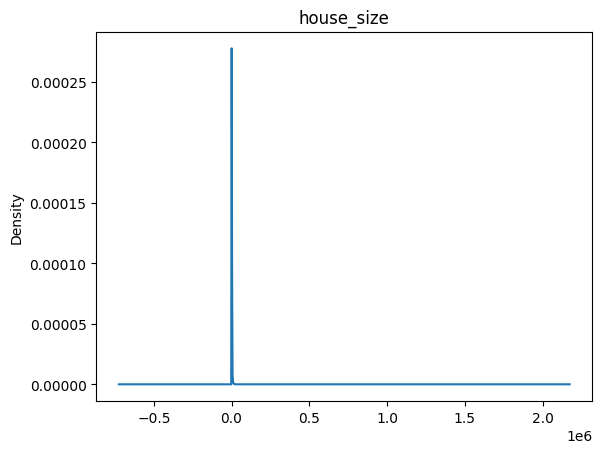

Skewness:  227.74140785315703


In [ ]:
data =  df['house_size']
data.plot(title="house_size", kind="density")
plt.show()
print("Skewness: ", data.skew())

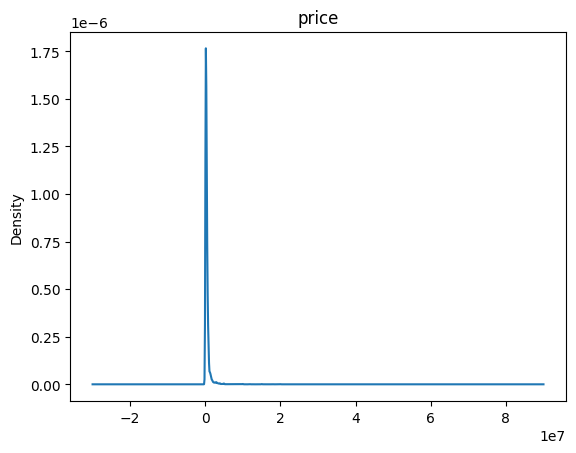

Skewness:  22.11572231913641


In [ ]:
data =  df['price']
data.plot(title="price", kind="density")
plt.show()
print("Skewness: ", data.skew())

Kurtosis

In [ ]:
df['bed'].kurt()
df['bath'].kurt()
df['house_size'].kurt()
df['price'].kurt()

946.7412561855958

##Grafica 2 diagramas de Caja y Bigote

Debido a que los datos cuentan con muchas anomalias, hemos decidido mostrar los cuartiles ya dados porque las graficas estan muy ilegibles. 

In [ ]:
q_bed = [
    df['bed'].quantile(0),
    df['bed'].quantile(0.25),
    df['bed'].quantile(0.50),
    df['bed'].quantile(0.75),
    df['bed'].quantile(1),
]
q_bed

[1.0, 3.0, 3.0, 4.0, 86.0]

In [ ]:
q_zip = [
    df['zip_code'].quantile(0),
    df['zip_code'].quantile(0.25),
    df['zip_code'].quantile(0.50),
    df['zip_code'].quantile(0.75),
    df['zip_code'].quantile(1),
]
q_zip

[601.0, 971.0, 1225.0, 1611.0, 99999.0]

A continuación se muestran las graficas de caja y bigote de los datos: 

<Axes: >

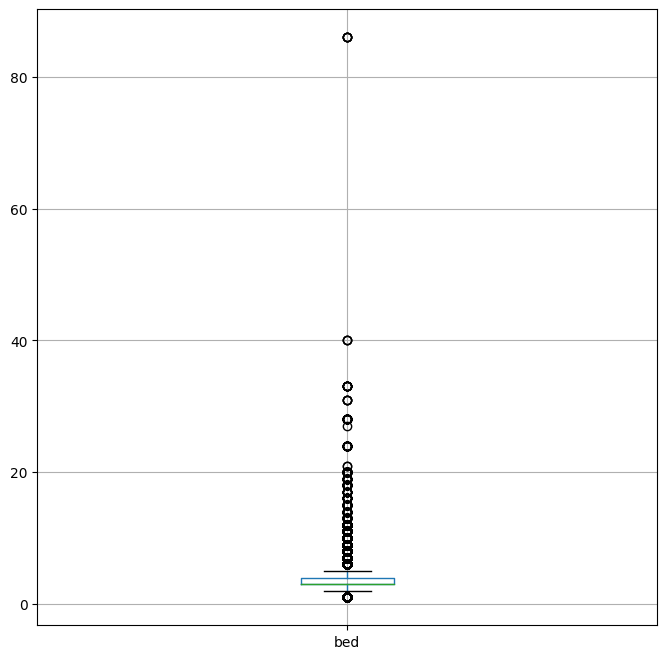

In [ ]:
df.boxplot(column="bed",
               return_type='axes',
               figsize=(8,8))

<Axes: >

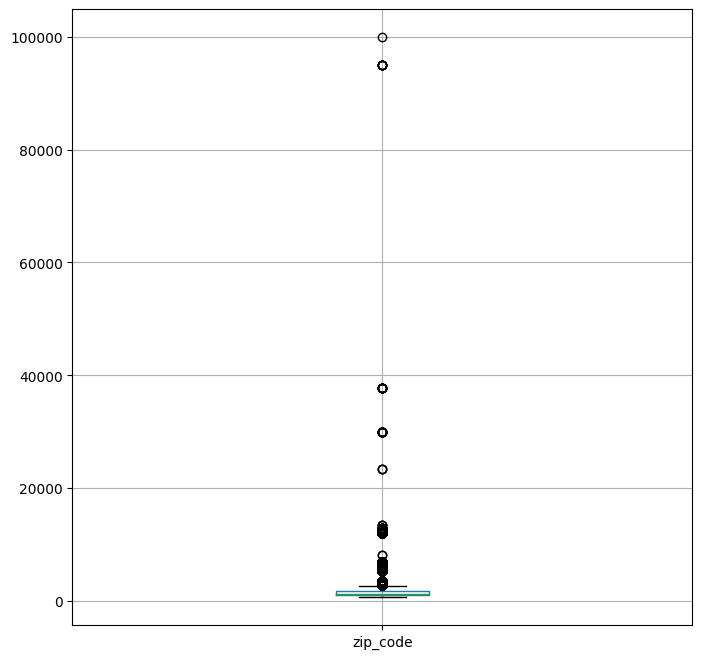

In [ ]:
df.boxplot(column="zip_code", return_type='axes',figsize=(8,8))

##Encuentra los outliers por variable

####Número de camas

In [ ]:
#Outliers para el número de camas
pd.set_option('display.max_rows', None)
Q1 = df['bed'].quantile(0.25)
Q3 = df['bed'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['bed'] < lower_bound) | (df['bed'] > upper_bound)]
print(outliers['bed'])

4         6.0
19        6.0
21        6.0
30        6.0
33        1.0
39        9.0
41        6.0
47        1.0
50        6.0
56        6.0
64        7.0
70        6.0
94        6.0
105       6.0
115       8.0
133       8.0
141       7.0
152      12.0
154       9.0
159       1.0
161       9.0
175       6.0
178       8.0
184       8.0
190       6.0
192       7.0
207       1.0
210       6.0
211       6.0
213       9.0
215       9.0
225       1.0
229       1.0
230       6.0
233       7.0
235       6.0
246       7.0
253       8.0
271       6.0
282       7.0
295       6.0
320       6.0
336       7.0
340       6.0
343       6.0
357       1.0
369       8.0
375       1.0
387      12.0
389       1.0
415       8.0
420       6.0
423       1.0
426       8.0
429       1.0
431      12.0
434       6.0
452       6.0
465       6.0
474       6.0
476       1.0
523       7.0
525       6.0
533       1.0
539       6.0
541       9.0
554       8.0
560       8.0
566       7.0
581      12.0
587       9.0
588   

####Número de baños

In [ ]:
#Outliers para el número de baños
pd.set_option('display.max_rows', None)
Q1 = df['bath'].quantile(0.25)
Q3 = df['bath'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['bath'] < lower_bound) | (df['bath'] > upper_bound)]
print(outliers['bath'])

14        5.0
39        7.0
41        6.0
56        5.0
64        5.0
66        6.0
70        5.0
90        5.0
133       5.0
147       5.0
152       6.0
154       8.0
161       7.0
178       6.0
184       5.0
191       5.0
194       7.0
213       8.0
215       7.0
278       5.0
285       6.0
330       5.0
369       5.0
370       5.0
378       5.0
387       6.0
414       5.0
415       5.0
420       8.0
426       7.0
428       6.0
431       6.0
434       6.0
452       6.0
466       5.0
527       6.0
528       5.0
532       7.0
539       6.0
541       7.0
560       5.0
567       5.0
581       6.0
587       8.0
590       7.0
636       7.0
643       7.0
655       5.0
658       5.0
659       5.0
674       6.0
716       5.0
728       7.0
861       5.0
893       6.0
894       5.0
976       5.0
988       7.0
1107      5.0
1117      7.0
1118      5.0
1119      7.0
1120      5.0
1124      7.0
1125      8.0
1126      9.0
1127      6.0
1128      7.0
1131      7.0
1132      6.0
1133      8.0
1134  

####Tamaño del terreno

In [ ]:
#Outliers para el tamaño del terreno
pd.set_option('display.max_rows', None)
Q1 = df['acre_lot'].quantile(0.25)
Q3 = df['acre_lot'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['acre_lot'] < lower_bound) | (df['acre_lot'] > upper_bound)]
print(outliers['acre_lot'])

9             7.46
10           13.39
36            4.84
43           18.45
61           21.08
68           33.35
69            8.74
101          10.76
120          11.00
124         247.57
125           5.00
128           5.14
129           4.86
131          12.25
138           4.74
139           7.46
168          20.40
169          14.34
170          16.22
171          17.97
182          13.39
197           7.46
204           4.84
211          16.00
218          14.34
220          20.40
222          17.97
248           4.89
270          13.39
303          10.68
304          18.45
364          10.29
371          10.76
377           4.74
395          20.40
397          14.34
399          16.22
401          17.97
404           6.44
405           5.78
420           9.65
424           4.74
428           5.00
433          14.34
434           7.80
441          16.22
444         112.66
448           6.44
458          13.39
459           7.46
484           4.84
489          18.45
490         

####Tamaño de la casa

In [ ]:
#Outliers para el tamaño de la casa
pd.set_option('display.max_rows', None)
Q1 = df['house_size'].quantile(0.25)
Q3 = df['house_size'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['house_size'] < lower_bound) | (df['house_size'] > upper_bound)]
print(outliers['house_size'])

9           5403.0
41          9297.0
42         43082.0
56          6000.0
69          5517.0
90          8460.0
139         5403.0
152         4800.0
155         6000.0
156         6500.0
167        43082.0
197         5403.0
210        10000.0
212         6000.0
216        43082.0
225        10000.0
240         6000.0
330         7000.0
387         4800.0
390         6500.0
415         8368.0
420        10244.0
428        10000.0
431         4800.0
434         8000.0
452         9297.0
459         5403.0
492        43082.0
522         5403.0
539         9297.0
542        43082.0
557        20132.0
572         5403.0
581         4800.0
582         6500.0
584         6000.0
597        43082.0
616         5000.0
626         5000.0
628        13818.0
636         7096.0
643         7000.0
655         7000.0
659         5000.0
661         6703.0
674         4800.0
984         5000.0
1117        6500.0
1118        4850.0
1119        5500.0
1124        5073.0
1125       10000.0
1126        

####Precio

In [ ]:
#Outliers para el precio
pd.set_option('display.max_rows', None)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(outliers['price'])

41        3900000.0
56       10000000.0
66        3250000.0
69        1399000.0
124       8000000.0
125       1000000.0
155       1200000.0
210       1800000.0
212       1200000.0
264       1200000.0
285       3000000.0
297       1100000.0
329       2000000.0
330      11500000.0
334       3500000.0
338       5000000.0
344       1325000.0
349       1100000.0
356       1125000.0
364       1321000.0
404       1400000.0
420       2500000.0
428       1995000.0
434       3000000.0
448       1400000.0
452       3900000.0
527       3000000.0
538       1100000.0
539       3900000.0
584       1200000.0
636      12000000.0
640       1150000.0
642       5500000.0
643      16000000.0
647       1275000.0
648       1135000.0
649       4995000.0
655      11500000.0
656       2500000.0
657       1100000.0
658       5950000.0
659       2849000.0
661       6495000.0
662       1300000.0
663       6350000.0
664       2000000.0
666       5900000.0
667       1775000.0
668       1795000.0
669       3500000.0


##Desarrolla y describe un modelo de K-Means para el dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('realtor-data.csv')

In [ ]:
data.dropna(inplace=True)

In [ ]:
X = data[['price', 'bath', 'bed', 'acre_lot']].values

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

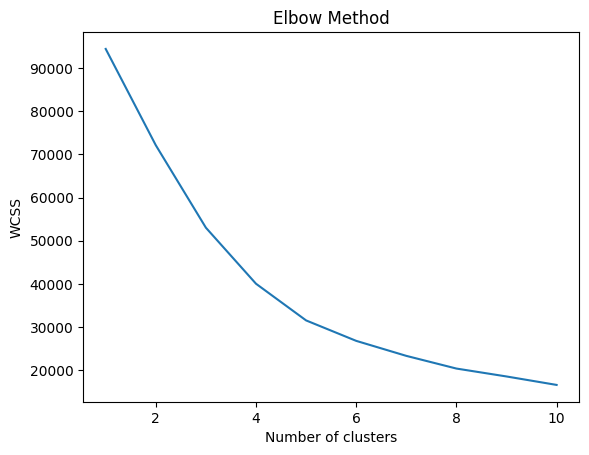

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [ ]:
kmeans.fit(X_scaled)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [ ]:
y_kmeans = kmeans.predict(X_scaled)

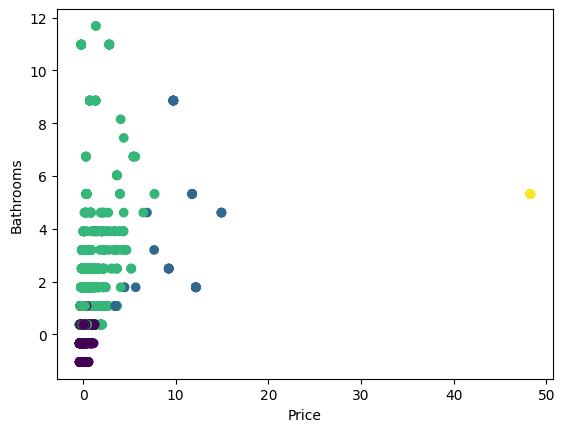

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.xlabel('Price')
plt.ylabel('Bathrooms')
plt.show()

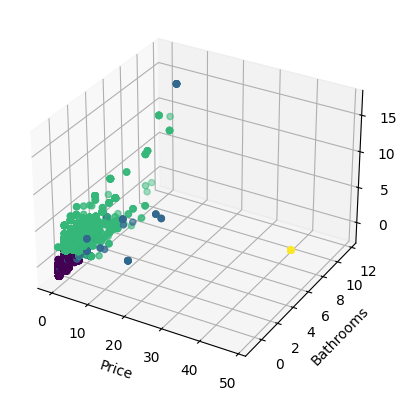

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_kmeans, cmap='viridis')
ax.set_xlabel('Price')
ax.set_ylabel('Bathrooms')
ax.set_zlabel('Bedrooms')
plt.show()

#Disclaimer 

Los datos y la información utilizados en este dataset fueron usados únicament con fines educativos. No somos dueños de los datos y los derechos de estos mismos están reservados a sus respectivos dueños.
